<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_4_3_Quadratic_cost_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize

In [ ]:
L2_norm2     = lambda w0,w1: w0**2 + w1**2
L1_norm      = lambda w0,w1: np.abs(w0) + np.abs(w1)
def draw_cost():
  plt.contourf(grid0, grid1, grid_cost, cmap="Greys");
  plt.xlabel("$w_0$");
  plt.ylabel("$w_1$");
  plt.title("$C(w_0,w_1)$", size=15)
  plt.colorbar();

In [ ]:
center  = (4., 3.)
hessian = [1/8, 1/32]

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


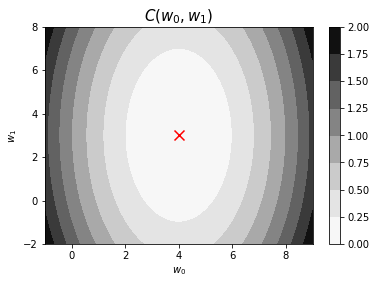

In [ ]:
range0, range1 = center[0] + torch.linspace(-5, 5, 1000), center[1] + torch.linspace(-5, 5, 1000)
grid0, grid1   = torch.meshgrid(range0,range1)
grid_cost      = torch.zeros(grid0.size())

quad_cost      = lambda w0,w1: 1/2 * (hessian[0] * (w0 - center[0])**2 + hessian[1] * (w1 - center[1])**2)
grid_cost      = quad_cost(grid0,grid1)
draw_cost()
plt.scatter(*center, s=100, marker="x", color="r");

In [ ]:
reg_range = np.linspace(0,0.3,50)

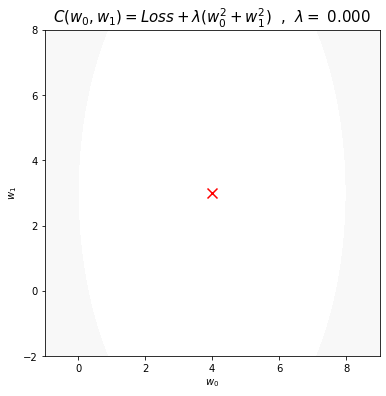

In [ ]:
from scipy import optimize
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(6)
bounds = [(-4, 4), (-4, 4)]
def run(reg_rate):
  target   = lambda x: quad_cost(*x) + reg_rate * L2_norm2(*x)
  results  = optimize.minimize(target, x0=center, bounds=bounds)
  reg_cost = grid_cost + reg_rate * L2_norm2(grid0, grid1)
  ax.clear()
  map = ax.contourf(grid0, grid1, reg_cost, levels=np.linspace(1,10,10), cmap="Greys");
  ax.scatter(*results.x, s=100, marker="x", color="r")
  ax.set_xlabel("$w_0$");
  ax.set_ylabel("$w_1$");
  ax.set_title("$C(w_0,w_1)=Loss+\lambda(w_0^2+w_1^2)$  ,  $\lambda =$ %1.3f" %reg_rate,size=15)

ani = animation.FuncAnimation(fig, run, frames=reg_range)
HTML(ani.to_html5_video())

In [ ]:
reg_range = np.linspace(0, 0.5, 50)

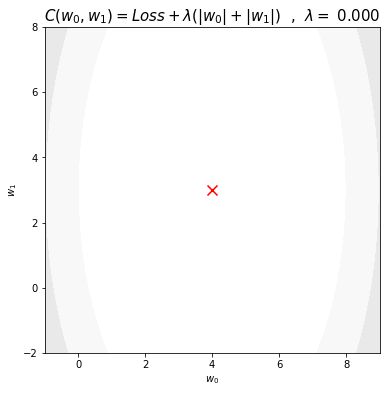

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(6)
bounds = [(-4, 4), (-4, 4)]
def run(reg_rate):
  target   = lambda x: quad_cost(*x) + reg_rate * L1_norm(*x)
  results  = optimize.minimize(target, x0=[2, 2], bounds=bounds)
  reg_cost = grid_cost + reg_rate * L1_norm(grid0,grid1)
  ax.clear()
  map = ax.contourf(grid0, grid1, reg_cost, levels=np.linspace(1,6,10), cmap="Greys");
  ax.scatter(*results.x, s=100, marker="x", color="r")
  ax.set_xlabel("$w_0$");
  ax.set_ylabel("$w_1$");
  ax.set_title("$C(w_0,w_1)=Loss+\lambda(|w_0|+|w_1|)$  ,  $\lambda =$ %1.3f" %reg_rate, size=15)


ani = animation.FuncAnimation(fig, run, frames=reg_range)
HTML(ani.to_html5_video())